In [1]:
import pandas as pd

### Loading the dataset

In [2]:
df = pd.read_csv(r'C:\Users\Sourav\Desktop\DUK\Assignments\COVIDSenti-A.csv')
df

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


In [3]:
df.shape

(30000, 2)

In [4]:
df.columns

Index(['tweet', 'label'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   30000 non-null  object
 1   label   30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


In [6]:
df.describe()

,tweet,label
count,30000,30000
unique,29987,3
top,Copper price and coronavirus: ‚ÄúBlack swan li...,neu
freq,3,22949


In [7]:
df.label.value_counts()

neu    22949
neg     5083
pos     1968
Name: label, dtype: int64

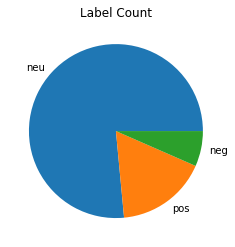

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 4))
x = df['label'].value_counts()
labels=['neu', 'pos', 'neg']
plt.pie(x, labels=labels)
plt.title("Label Count")
plt.show()

In [9]:
df[df['label']=='neu'].loc[17,'tweet']

'Genome sequence of the new coronavirus associated with a pneumonia cluster in Wuhan, China: https://t.co/6k5urEWn7G'

In [10]:
df[df['label']=='neg'].loc[16,'tweet']

'@KariDebbink @Vineet321 The Frieman Scary Scale makes its debut. Wuhan Coronavirus scores 3 out of 10 N95 masks.'

In [11]:
df[df['label']=='pos'].loc[70,'tweet']

"Novel #Wuhan #coronavirus virus cases leap up.\nLatest blog, which doesn't include 1 case from Shenzhen and 2 cases‚Ä¶ https://t.co/lJks3nQK10"

From the above tweets we can understand that the texts are not plain. We have to clean this text

### Looking For Null Values

In [12]:
df.isnull().sum()

tweet    0
label    0
dtype: int64

There are no missing values in the dataset.

### Data Preprocessing

In [13]:
import re
import numpy as np

In [14]:
# Function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [15]:
# Create new column with removed @user
df['tweet'] = np.vectorize(remove_pattern)(df['tweet'], '@[\w]*')

In [16]:
# Removing HTTP and urls from tweets
df['tweet'] = df['tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [17]:
# Removing special characters, numbers, punctuations
df['tweet'] = df['tweet'].str.replace('[^a-zA-Z#]+',' ')

C:\Users\Sourav\AppData\Local\Temp/ipykernel_18104/1287549166.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace('[^a-zA-Z#]+',' ')


In [18]:
df['tweet'] = df['tweet'].str.replace('#',' ')

In [19]:
# Making all the words in lower case
df['tweet']=df['tweet'].str.lower() 

In [20]:
df.head()

,tweet,label
0,coronavirus human coronavirus types cdc,neu
1,that s true corona virus swine flue bird flu ...,neu
2,tldr not sars possibly new coronavirus difficu...,neg
3,disease outbreak news from the who middle east...,neu
4,china media wsj says sources tell them mystery...,neu


In [21]:
# Removing short words
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [22]:
df.head()

,tweet,label
0,coronavirus human coronavirus types cdc,neu
1,that true corona virus swine flue bird flu dec...,neu
2,tldr not sars possibly new coronavirus difficu...,neg
3,disease outbreak news from the who middle east...,neu
4,china media wsj says sources tell them mystery...,neu


In [23]:
df[df['label']=='neu'].loc[17,'tweet']

'genome sequence the new coronavirus associated with pneumonia cluster wuhan china'

In [24]:
# Creating new variable tokenized tweet 
tokenized_tweet = df['tweet'].apply(lambda x: x.split())

In [25]:
tokenized_tweet[:5]

0        [coronavirus, human, coronavirus, types, cdc]
1    [that, true, corona, virus, swine, flue, bird,...
2    [tldr, not, sars, possibly, new, coronavirus, ...
3    [disease, outbreak, news, from, the, who, midd...
4    [china, media, wsj, says, sources, tell, them,...
Name: tweet, dtype: object

In [26]:
#Importing required resources
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sourav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sourav\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [27]:
# Importing necessary modules
#from nltk.stem import WordNetLemmatizer
  
#lemmatizer = WordNetLemmatizer()
  
# Applying Lemmatizer for tokenized_tweet
#tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

In [28]:
# stemming

from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [29]:
tokenized_tweet[:5]

0           [coronaviru, human, coronaviru, type, cdc]
1    [that, true, corona, viru, swine, flue, bird, ...
2    [tldr, not, sar, possibl, new, coronaviru, dif...
3    [diseas, outbreak, news, from, the, who, middl...
4    [china, media, wsj, say, sourc, tell, them, my...
Name: tweet, dtype: object

In [30]:
# Join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [31]:
df['Tweet']  = tokenized_tweet

In [32]:
df.drop('tweet',axis=1,inplace=True)

In [33]:
df.head()

,label,Tweet
0,neu,coronaviru human coronaviru type cdc
1,neu,that true corona viru swine flue bird flu dece...
2,neg,tldr not sar possibl new coronaviru difficult ...
3,neu,diseas outbreak news from the who middl east r...
4,neu,china media wsj say sourc tell them mysteri pn...


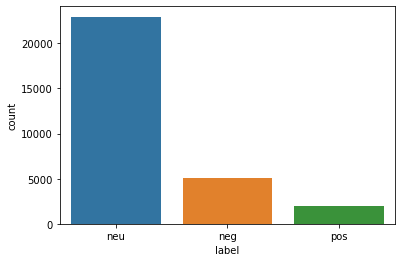

In [34]:
import seaborn as sns

sns.countplot(x="label", data=df)
plt.show()

In [35]:
X = df['Tweet']
y = df['label']

In [36]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features = 5000)
tfidf_vect.fit(df['Tweet'])
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

In [38]:
print(X_train_tfidf)

  (0, 4342)	0.17627110553131367
  (0, 2304)	0.670531751514671
  (0, 1566)	0.5024084601979811
  (0, 909)	0.10415530917148966
  (0, 78)	0.5060168754679246
  (1, 4895)	0.20763216951937274
  (1, 4450)	0.4333298827274691
  (1, 4447)	0.3367919315546907
  (1, 3187)	0.2988686550994555
  (1, 2949)	0.3090286285619518
  (1, 2682)	0.27436055193799735
  (1, 1637)	0.29156807634611187
  (1, 909)	0.052752311616031236
  (1, 695)	0.12404136163968728
  (1, 690)	0.3221271124954192
  (1, 666)	0.3665659291277615
  (1, 147)	0.23296554487693258
  (2, 4406)	0.30660034476466197
  (2, 4341)	0.23412952685999885
  (2, 3266)	0.4090013003772608
  (2, 2516)	0.40130924150741326
  (2, 2405)	0.3931812099685709
  (2, 1634)	0.1995605841985096
  (2, 1588)	0.2743101233317863
  (2, 1433)	0.46824143866317885
  :	:
  (20996, 2175)	0.21864043499160268
  (20996, 1438)	0.3573097202290839
  (20996, 898)	0.16907521607413062
  (20996, 382)	0.33440519876503094
  (20996, 158)	0.1560265759275382
  (20997, 4855)	0.39800309141613605
  (2

In [39]:
print(X_test_tfidf)

  (0, 4799)	0.34261472710627666
  (0, 4707)	0.13351598753247038
  (0, 4342)	0.08530775429338622
  (0, 2971)	0.23998141765817935
  (0, 2472)	0.19724256311960667
  (0, 1674)	0.29528814580820856
  (0, 1548)	0.27315852255673323
  (0, 1410)	0.3519735001804327
  (0, 1304)	0.380423642737007
  (0, 1217)	0.37419780603446634
  (0, 1199)	0.2326726621018658
  (0, 953)	0.22517243504096035
  (0, 898)	0.14135644782519918
  (0, 702)	0.1741917833733807
  (0, 119)	0.18817474092216138
  (1, 4486)	0.3493820162947222
  (1, 4342)	0.10734824331638464
  (1, 4088)	0.3003398952049028
  (1, 3059)	0.2624730703516679
  (1, 2888)	0.25283046751216715
  (1, 2804)	0.2696562353885312
  (1, 2183)	0.3339305771148553
  (1, 2175)	0.23002370123237414
  (1, 1141)	0.3277154647577033
  (1, 909)	0.06343007515572716
  :	:
  (8997, 400)	0.4152509656711668
  (8997, 359)	0.3951294652379873
  (8998, 4975)	0.21239209824684174
  (8998, 4054)	0.4266645800405539
  (8998, 3997)	0.36291591950119273
  (8998, 3978)	0.3512679984178015
  (899

In [40]:
print(tfidf_vect.vocabulary_)

{'coronaviru': 909, 'human': 2078, 'type': 4538, 'cdc': 635, 'that': 4341, 'true': 4508, 'corona': 898, 'viru': 4707, 'swine': 4245, 'bird': 421, 'flu': 1616, 'decemb': 1075, 'when': 4821, 'whole': 4837, 'busi': 552, 'tldr': 4413, 'not': 2882, 'sar': 3690, 'possibl': 3185, 'new': 2831, 'difficult': 1171, 'confirm': 840, 'becaus': 365, 'patient': 3059, 'identifi': 2105, 'later': 2407, 'infect': 2175, 'diseas': 1199, 'outbreak': 2977, 'news': 2839, 'from': 1695, 'the': 4342, 'who': 4835, 'middl': 2667, 'east': 1318, 'respiratori': 3549, 'syndrom': 4257, 'mer': 2647, 'cov': 959, 'unit': 4585, 'arab': 218, 'china': 695, 'media': 2630, 'wsj': 4921, 'say': 3701, 'sourc': 4000, 'tell': 4309, 'them': 4347, 'mysteri': 2783, 'pneumonia': 3157, 'someth': 3978, 'ha': 1887, 'been': 369, 'caus': 626, 'same': 3677, 'famili': 1514, 'and': 158, 'virologist': 4705, 'weigh': 4794, 'novel': 2888, 'chines': 702, 'author': 286, 'have': 1937, 'made': 2550, 'preliminari': 3217, 'determin': 1144, 'hospit': 205

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import LabelBinarizer

In [42]:
svm_model = SVC(probability = True, kernel = 'linear')
svm_model.fit(X_train_tfidf, y_train )

SVC(kernel='linear', probability=True)

In [43]:
svm_predictions = svm_model.predict(X_test_tfidf)
pred_data = pd.DataFrame()
pred_data['Tweet'] = X_test
pred_data['Label'] = svm_predictions
pred_data

,Tweet,Label
8225,dutert like welcom all chines especi corona vi...,neu
10794,cdc detail inform state the infect novel coron...,neu
9163,coronaviru updat pandem,neu
26591,more than healthcar personnel china infect wit...,pos
6631,brent recoup china viru angst fed speak play m...,neu
...,...,...
21914,unit panic bought striker and are now tell him...,neu
17453,teehe coronaviru pangolin host,neu
20344,nzd usd technic bia bearish dow jone brush off...,neu
1878,coronaviru sound like someth you catch drink b...,neu


In [44]:
pred_data['Label'].value_counts()


neu    7370
neg    1256
pos     374
Name: Label, dtype: int64

In [45]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\programdata\anaconda3\lib\site-packages
Requires: threadpoolctl, joblib, numpy, scipy
Required-by: scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.


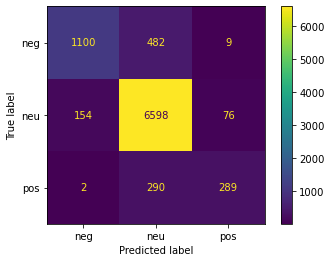

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, svm_predictions)

In [47]:
svm_accuracy = accuracy_score(svm_predictions, y_test)*100
svm_accuracy

88.74444444444445

In [48]:
print("Classification Report:")
print(classification_report(y_test, svm_predictions))

Classification Report:
              precision    recall  f1-score   support

         neg       0.88      0.69      0.77      1591
         neu       0.90      0.97      0.93      6828
         pos       0.77      0.50      0.61       581

    accuracy                           0.89      9000
   macro avg       0.85      0.72      0.77      9000
weighted avg       0.88      0.89      0.88      9000

